In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import Functions.PCA as pca
import Functions.data_load as dat
import Functions.visualization as vis
import Functions.average_img as avg
import Functions.k_nearest as knn

#load data
train_array, test_array = dat.load_data()
cleaned_arr = dat.clean_train_arr()
z_arr = pca.z_arr(cleaned_arr)
val_arr = dat.load_val_arr()

In [2]:
pca.arr_only(z_arr, pca.create_sorted_eigenvec(30))

numpy.ndarray

In [2]:
train_arr_cleaned_df = pd.read_csv("data/pca/cleaned_train_array.csv", header = None)
train_arr_cleaned = train_arr_cleaned_df.to_numpy()

In [11]:
z_array = pca.z_arr(train_arr_cleaned)

df = pd.DataFrame(z_array)
df.to_csv('data/pca/z_array.csv', index=None, header=None)

In [8]:
knn.validation_kNN_train(1000, k=10, PC = 7)

Anzahl richtig erkannter Digits: 847
Anzahl falsch erkannter Digits: 153

Anteil richtiger Vorhersagen: 84.7%


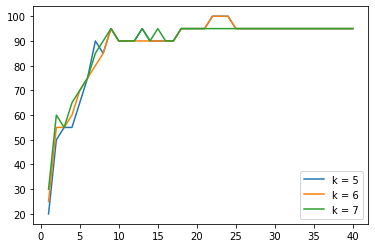

In [27]:
val_arr1[:,0]
PCs = list(range(1, 41))
plt.plot(PCs, val_arr1[:,0], label = "k = 5")
plt.plot(PCs, val_arr1[:,1], label = "k = 6")
plt.plot(PCs, val_arr1[:,2], label = "k = 7")
plt.legend()

In [36]:
#precise array mit validation für PC 27 bis 35, jeweils mit k3/4/5
#0:30 mit 10
#1:15 mit 50
# 21:00 mit 1000
precise_val_arr = np.zeros((9, 3))
for i in range(0, 9):
    for j in range(0, 3):
        precise_val_arr[i, j] = knn.validation_kNN_train_matrix(10000, k=j+3, PC=i+27)

df = pd.DataFrame(precise_val_arr)
df.to_csv('data/precise_val_array.csv', index=None, header=None)

/Users/benjaminwehnert/digitrecognition/2022-topic-01-team-02/Functions/k_nearest.py:22: RuntimeWarning: invalid value encountered in sqrt
  dist_arr =  np.sqrt(img_dot + arr_dot - 2*np.dot(img_reduced, arr_reduced[:, :].T))


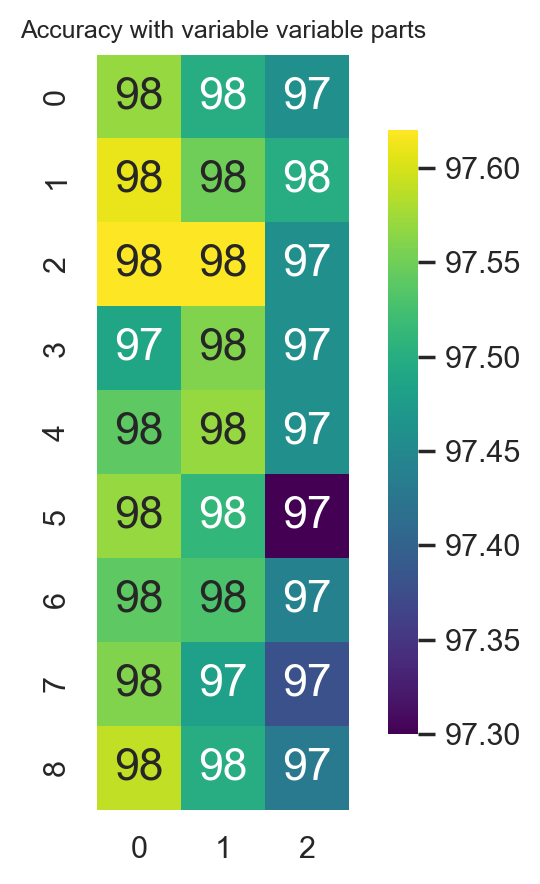

In [5]:
precise_val_arr = dat.load_precise_val_arr()
vis.heatmap(precise_val_arr)

In [35]:
val_arr[26:35, 2:5]

array([[97.8, 97.6, 97.5],
       [97.5, 97.5, 97.6],
       [97.6, 97.6, 97.5],
       [97.6, 97.7, 97.6],
       [97.3, 97.3, 97.3],
       [97.4, 97.3, 97.2],
       [97.4, 97.5, 97.6],
       [97.5, 97.5, 97.6],
       [97.9, 97.7, 97.6]])

In [4]:
if val_arr[26:35, 2:5] == precise_val_arr:
    print("True")

array([[100., 100., 100., 100.,  90.,  90.,  90.,  90.,  90.,  90.],
       [100., 100., 100., 100.,  90.,  90.,  90.,  90.,  90.,  90.],
       [100., 100., 100., 100.,  90.,  90.,  90.,  90.,  90.,  90.],
       [100., 100.,  90.,  90.,  90.,  90.,  90.,  90.,  90.,  90.],
       [100., 100.,  90.,  90.,  90.,  90.,  90.,  90.,  90.,  90.],
       [100., 100.,  90.,  90.,  90.,  90.,  90.,  90.,  90.,  90.],
       [100., 100.,  90.,  90.,  90.,  90.,  90.,  90.,  90.,  90.],
       [100., 100.,  90.,  90.,  90.,  90.,  90.,  90.,  90.,  90.],
       [100., 100.,  90.,  90.,  90.,  90.,  90.,  90.,  90.,  90.],
       [100., 100.,  90.,  90.,  90.,  90.,  90.,  90.,  90.,  90.]])

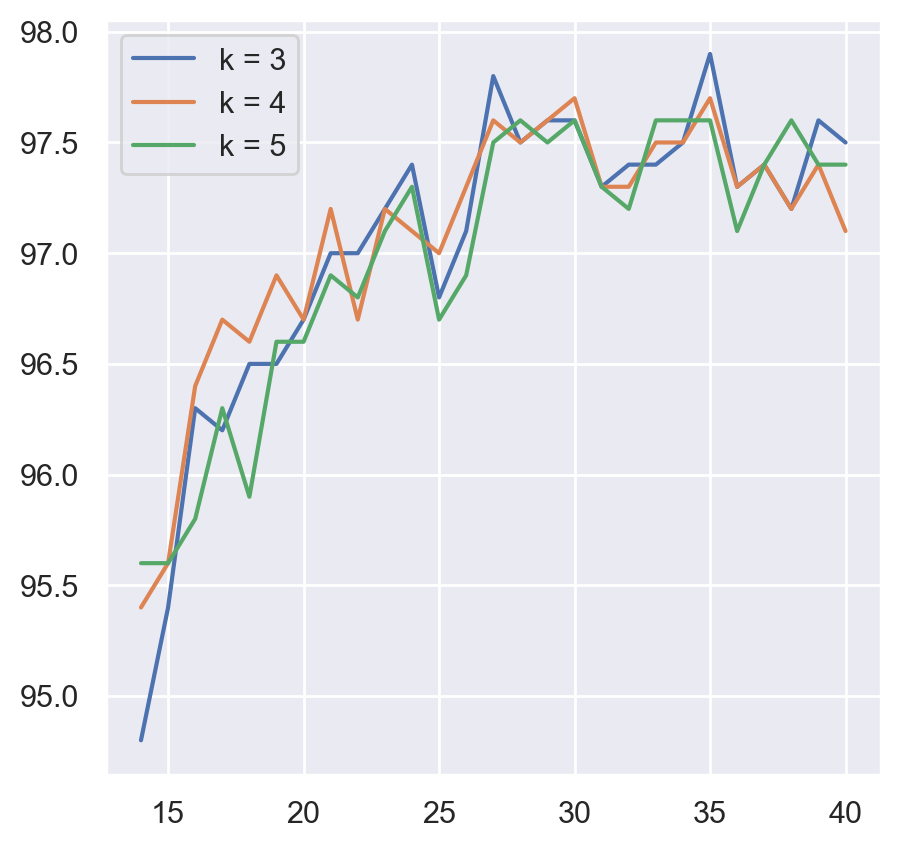

In [29]:
PCs = list(range(14, 41))
for i in range(2,5):
    plt.plot(PCs, val_arr[13:40 ,i], label = f"k = {i+1}")
plt.legend()

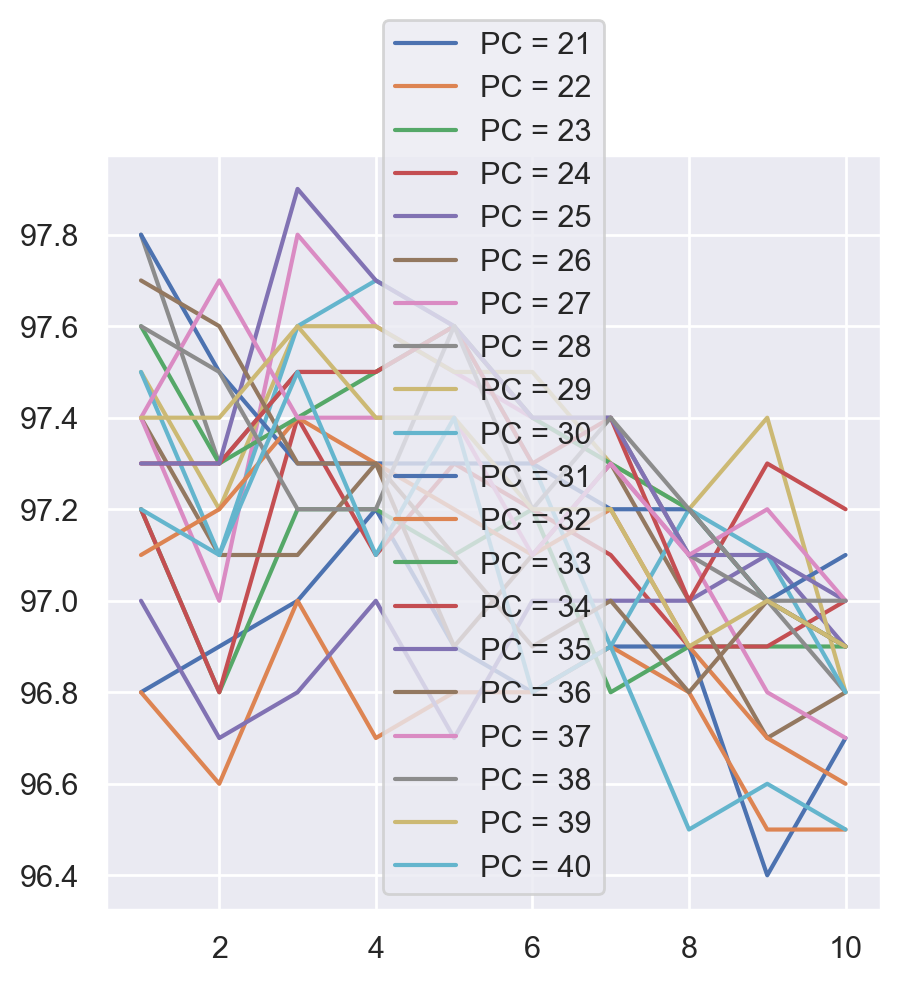

In [25]:
k = list(range(1, 11))
for i in range(20,40):
    plt.plot(k, val_arr[i ,0:10], label = f"PC = {i+1}")
plt.legend()

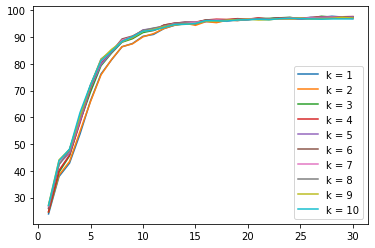

In [8]:
PCs = list(range(1, 31))
plt.plot(PCs, val_arr[:,0], label = "k = 1")
plt.plot(PCs, val_arr[:,1], label = "k = 2")
plt.plot(PCs, val_arr[:,2], label = "k = 3")
plt.plot(PCs, val_arr[:,3], label = "k = 4")
plt.plot(PCs, val_arr[:,4], label = "k = 5")
plt.plot(PCs, val_arr[:,5], label = "k = 6")
plt.plot(PCs, val_arr[:,6], label = "k = 7")
plt.plot(PCs, val_arr[:,7], label = "k = 8")
plt.plot(PCs, val_arr[:,8], label = "k = 9")
plt.plot(PCs, val_arr[:,9], label = "k = 10")
plt.legend()

In [3]:
val_arr = dat.load_val_arr()
val_arr.shape

(40, 10)

In [4]:
def heatmap(arr, name = 'variable parts'):
    arr_df = pd.DataFrame(arr)
    sb.set(rc={"figure.dpi":200, "figure.figsize":(5, 5)})
    sb.heatmap(arr_df, cmap="viridis", annot=True, annot_kws={"size": 5}, square=True, cbar_kws={"shrink": 0.8})
    plt.title(f'Accuracy with variable {name}', fontsize =9)

In [19]:
#1
np.sum(val_arr[26:30, 2:5])/12

97.59166666666665

In [20]:
#2
np.sum(val_arr[32:35, 2:5])/9

97.5888888888889

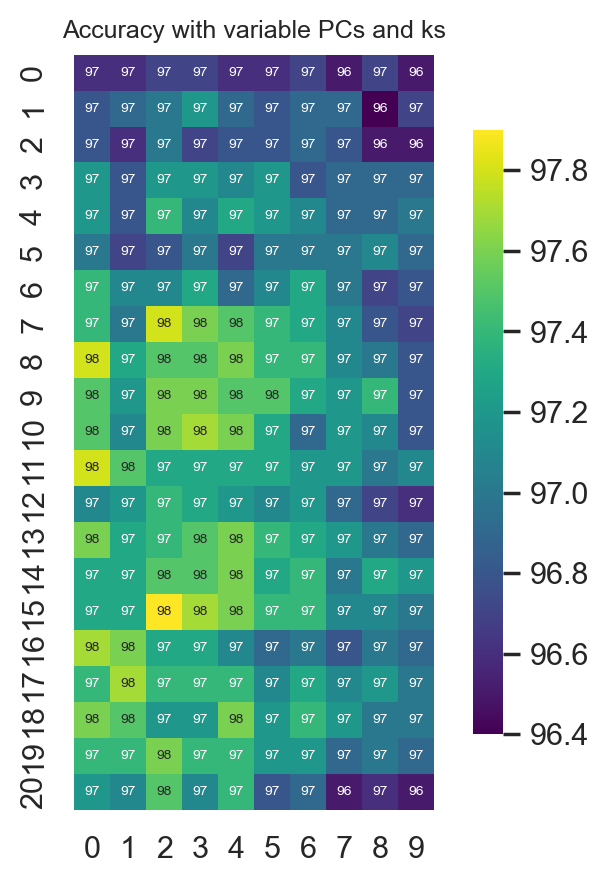

In [16]:
heatmap(val_arr[19:40,:], name = 'PCs and ks')